In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"

# Load the dataset directly from the URL
data = pd.read_csv(url)

## Data Pre-Processing

In this section we will make our data ready for model training. This will include:

* Encode Categorical features using dummy encoding
* Encode Boolean variables using label encoder
* Split Data into train and test set
* Scale train set using the standard scaler

In [5]:
# Encode categorical features (Month, Visitor Type) using dummy encoding

categorical = ['Month', 'VisitorType']

encoded_features = pd.get_dummies(data[categorical])
encoded_features.head(3)

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1


In [6]:
# Check shape
data.shape

(12330, 18)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

***There are 2 Boolean, 2 Categorical and 14 Numeric Variables (7 Integers and 7 Float) in the dataset.***

In [8]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

***There are no missing values in the dataset***

In [9]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


* ***On average, users visit 2 Administrative pages and 31 Product Related Pages. However, there is very little to no engagement with the Informational pages.***

In [10]:
data.describe(include=['object', 'bool'])

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


* ***Dataset contains records of 10 unique months; May occurs most frequently.***
* ***There are 3 unique Visitor Types with returning visitor being the most common type; occuring 10,551 instances.***

### Exploratory Data Analysis

    ### Correlation Analysis

<Axes: >

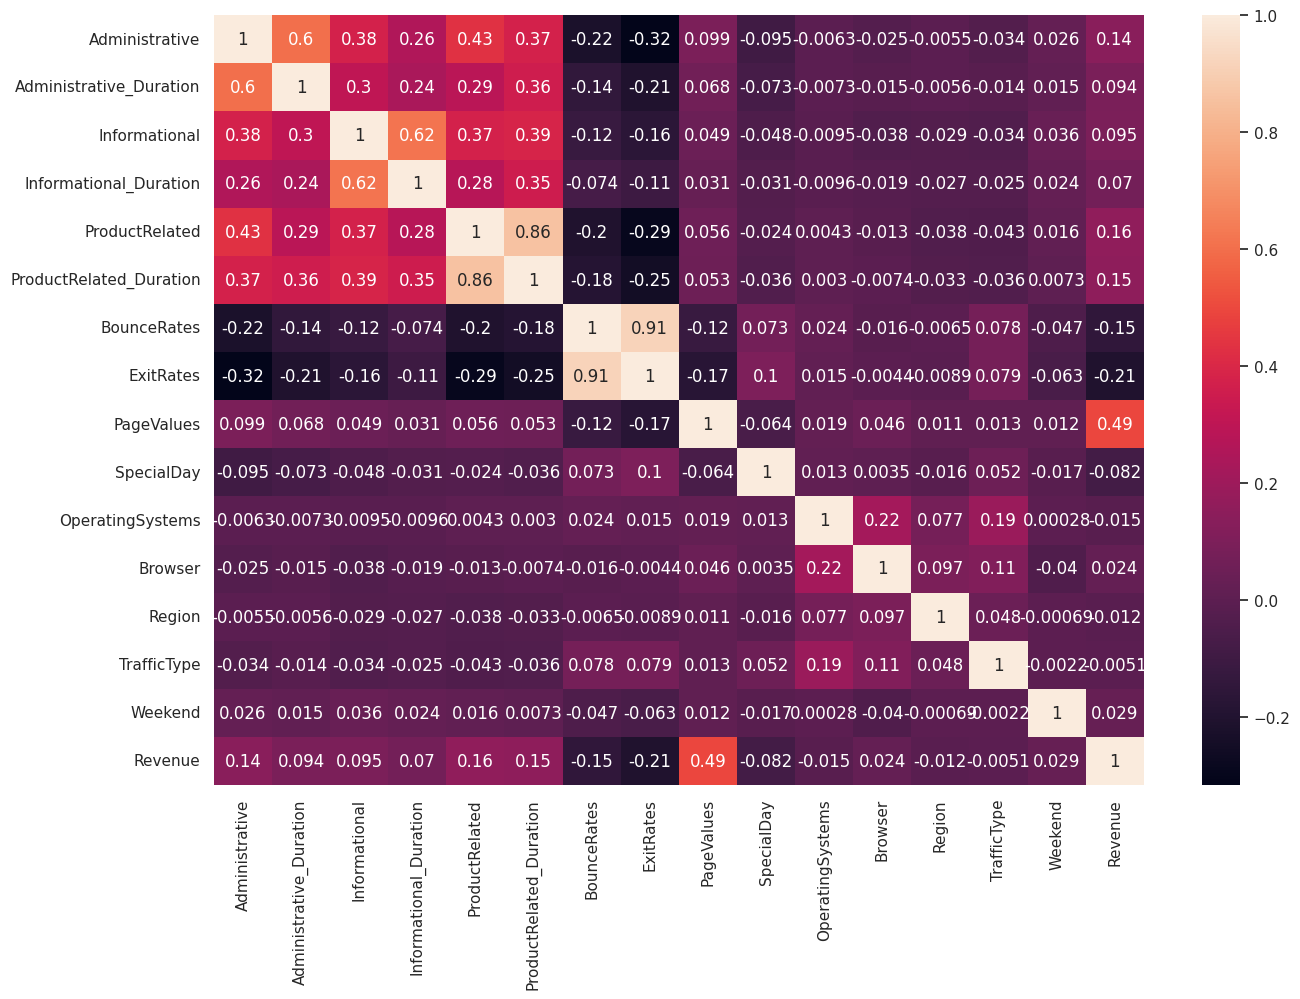

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

***The Heatmap shows there is little correlation among the different features with the exception of the following:***

- High correlation between:

        - BounceRates & ExitRates (0.91).
        - ProductRelated & ProductRelated_Duration (0.86).
- Moderate Correlations:

        - Administrative & Administrative DUration (0.6)
        - Informational and Informational Duration (0.62)
        - Page Values and Revenue (0.49)

## Page Matrix analysis:

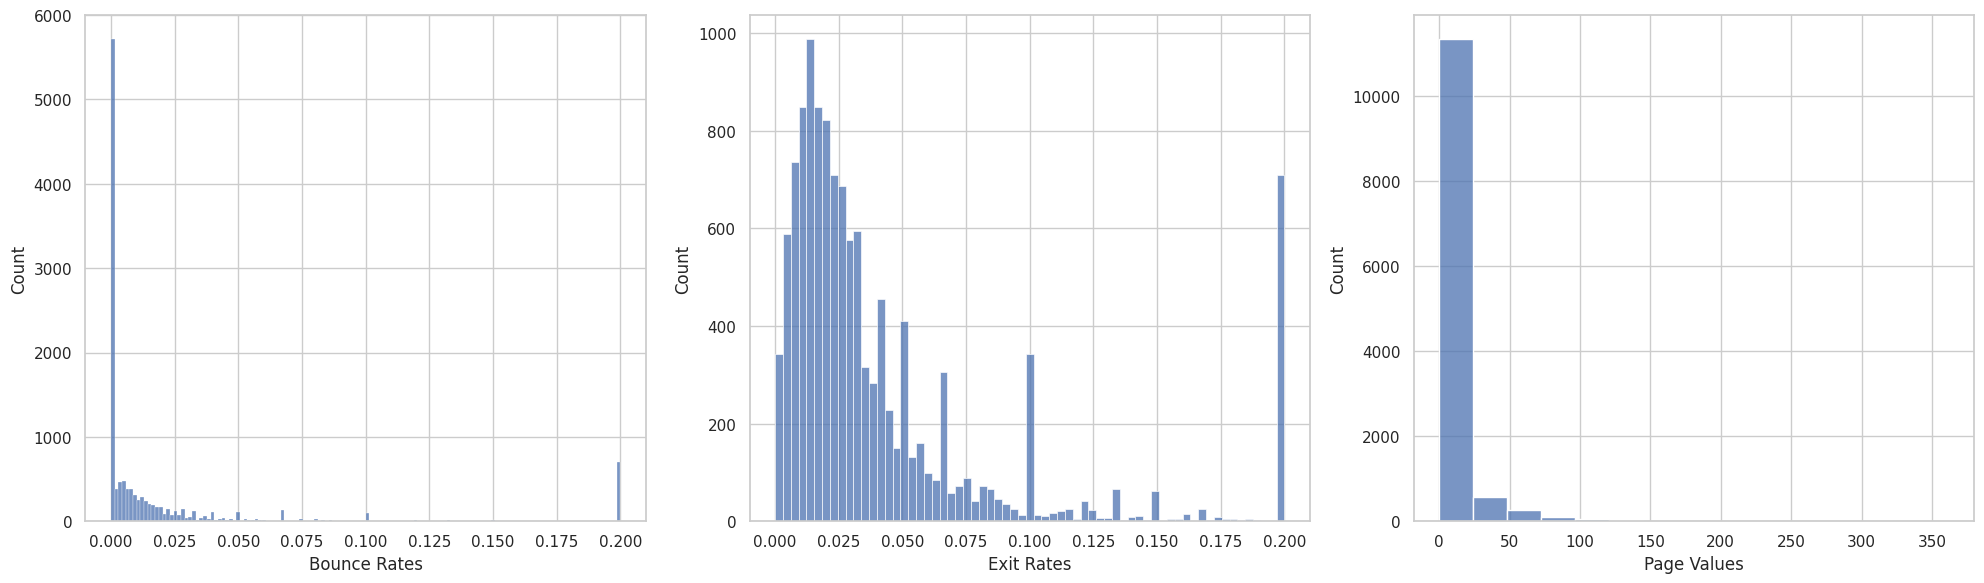

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(data['BounceRates'], ax=axes[0])
axes[0].set_xlabel('Bounce Rates')

sns.histplot(data['ExitRates'], ax=axes[1])
axes[1].set_xlabel('Exit Rates')

sns.histplot(data['PageValues'], ax=axes[2])
axes[2].set_xlabel('Page Values')

plt.tight_layout()
plt.show()


The above distribution plots of Page Metrics show the following:

* All 3 features have distributions that are right skewed with a lot of outliers.
* The average bounce rate of most of our data points is low. This is a positive observation as high rates would identicate that visitors are not engaging with the website.
* Exit rates are higher in values than bounce rates. This is expected as we can assume that transaction confirmation pages will cause the average exit rate to increase.

## Revenue Analysis

In [ ]:
data.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

0 represents False and 1 represents True

In [ ]:
revenue_ratio = data.Revenue.value_counts(normalize=True)
revenue_ratio

0    0.845255
1    0.154745
Name: Revenue, dtype: float64

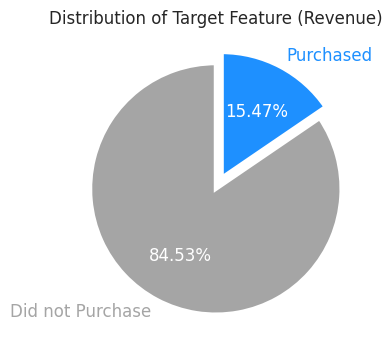

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

x=revenue_ratio

cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, len(x))))

colors[1]='dodgerblue'
labels = ['Did not Purchase','Purchased']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'},
    startangle=90,
    colors=colors,
    explode=(0, 0.1))

for i, patch in enumerate(patches):
   texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=300)
ax.set_title('Distribution of Target Feature (Revenue)', fontsize=12)
plt.tight_layout()

Imbalance in the output variable, where 84.53% didnot purchase.

Revenue by visitor type"

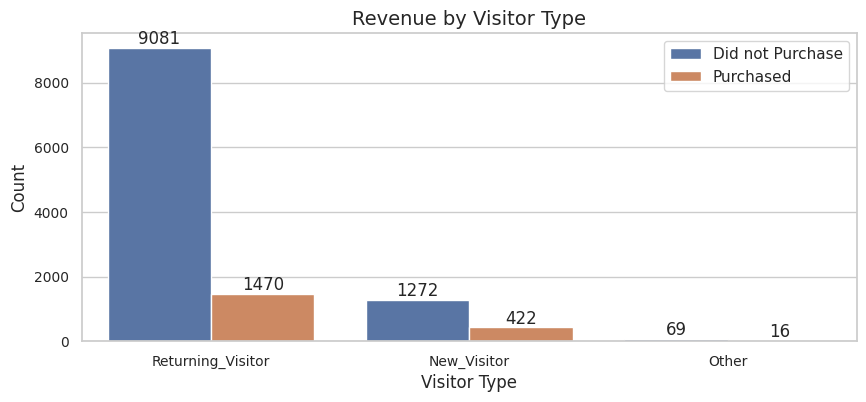

In [ ]:
plt.figure(figsize=(10,4))
plt.title("Revenue by Visitor Type", fontsize=14)
ax = sns.countplot(x='VisitorType', data=data, hue = 'Revenue')
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Visitor Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

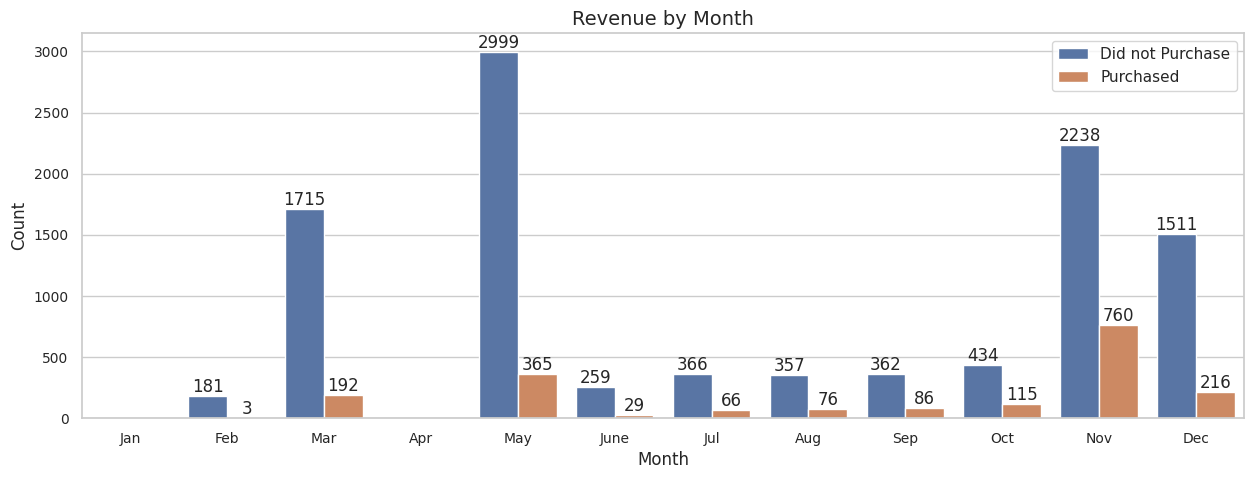

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Revenue by Month", fontsize=14)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']

ax = sns.countplot(x='Month', data=data, hue = 'Revenue', order=orderlist)
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* No data found for January and April
* Lot of the transaction happned at the end of the year

Revenue by Special Day:


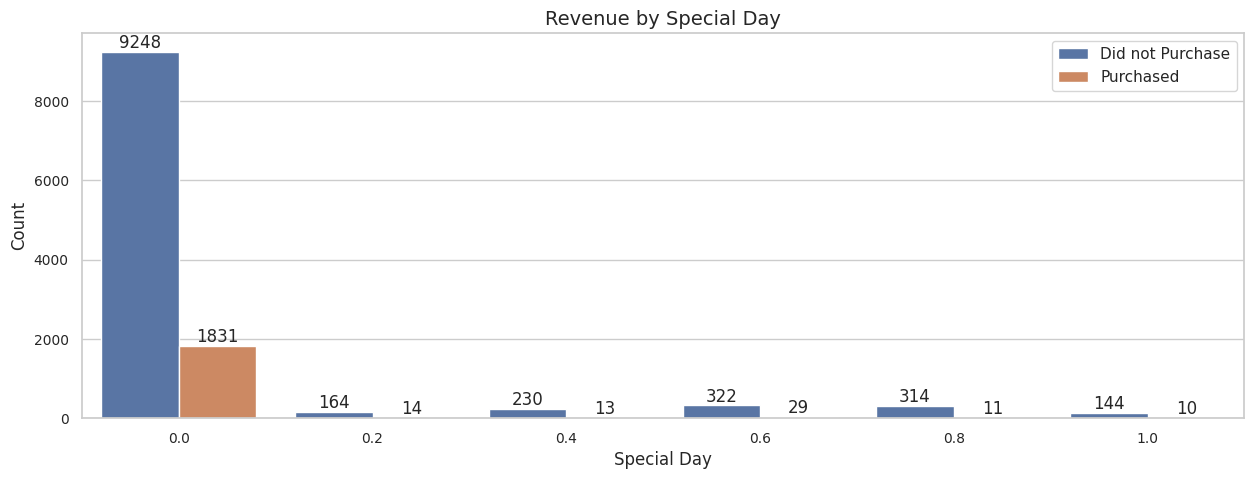

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Revenue by Special Day", fontsize=14)

ax = sns.countplot(x='SpecialDay', data=data, hue = 'Revenue')
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Special Day", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* ***There were significantly more website visitors and revenue generated (Completed purchases) on Special Day 0.0 in comparison to the other special days.***

Revenue by page type/ Duration

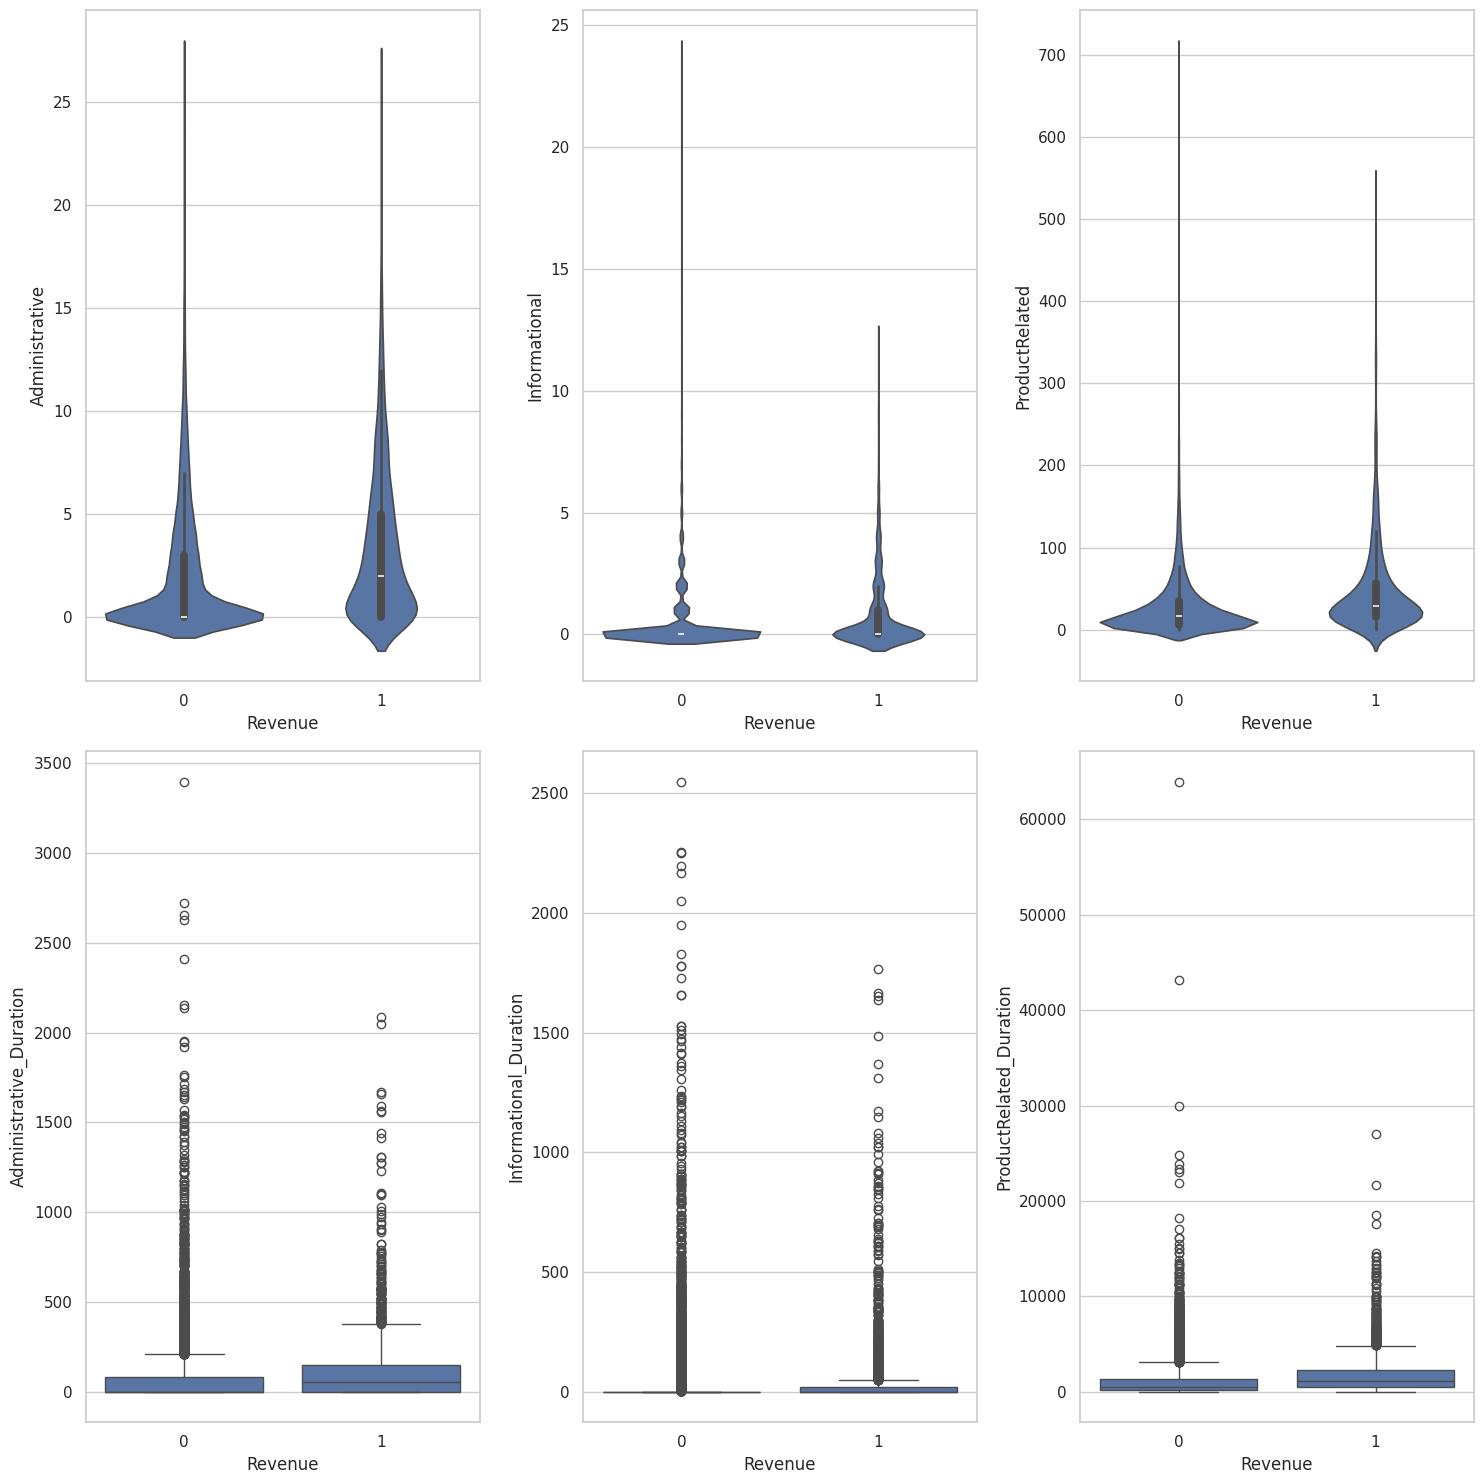

In [ ]:
  fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=data, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=data, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=data, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=data, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=data, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=data, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

* ***Visitors tend to visit less pages, and spend less time, if they are not going to make a purchase.***
* ***The number of product related pages visited and time spent on them is more than that for account related or informational pages.***

## Data Pre-Processing

In this section we will make our data ready for model training. This will include:

* Encode Categorical features using dummy encoding
* Encode Boolean variables using label encoder
* Split Data into train and test set
* Scale train set using the standard scaler

In [12]:
# Encode categorical features (Month, Visitor Type) using dummy encoding

categorical = ['Month', 'VisitorType']

encoded_features = pd.get_dummies(data[categorical])
encoded_features.head(3)

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1


In [13]:
#Concactenante encoded features to dataset and drop non-encoded variables

data = pd.concat([data, encoded_features], axis=1)

data.drop(categorical, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [14]:
# Encode Boolean variables using label Encoder

le = LabelEncoder()

data['Revenue'] = le.fit_transform(data['Revenue'])
data['Weekend'] = le.fit_transform(data['Weekend'])

print(data.Revenue.value_counts())
print(data.Weekend.value_counts())

0    10422
1     1908
Name: Revenue, dtype: int64
0    9462
1    2868
Name: Weekend, dtype: int64


### Select Target and Features

In [15]:
y = data['Revenue']
X = data.drop('Revenue', axis=1)

In [16]:
#Split Dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [17]:
#Scale train set using Standard scaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [18]:
X_train_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
10199,-0.694627,-0.462164,2.749957,0.333852,-0.219900,-0.056562,-0.299152,-0.466608,-0.318655,-0.308288,...,-0.19107,-0.156757,-0.430408,-0.610422,1.753040,-0.212826,-0.193661,-0.398345,-0.082252,0.409599
3639,-0.694627,-0.462164,-0.391447,-0.246733,0.556815,1.576961,-0.385568,-0.504206,-0.318655,-0.308288,...,-0.19107,-0.156757,-0.430408,1.638212,-0.570438,-0.212826,-0.193661,-0.398345,-0.082252,0.409599
1066,-0.694627,-0.462164,-0.391447,-0.246733,-0.330859,-0.265090,-0.182629,-0.334212,-0.318655,-0.308288,...,-0.19107,-0.156757,2.323375,-0.610422,-0.570438,-0.212826,-0.193661,-0.398345,-0.082252,0.409599
1855,1.688134,1.737882,1.964606,-0.021537,6.570807,4.587441,-0.421270,-0.659159,0.023078,-0.308288,...,-0.19107,-0.156757,2.323375,-0.610422,-0.570438,-0.212826,-0.193661,-0.398345,-0.082252,0.409599
2075,-0.694627,-0.462164,0.393904,0.147361,-0.330859,0.104158,-0.336539,-0.520163,1.787309,-0.308288,...,-0.19107,-0.156757,2.323375,-0.610422,-0.570438,-0.212826,-0.193661,-0.398345,-0.082252,0.409599
